**Automatic ML - DS_C8_SC1_T3**

---


In [ ]:
import pandas as pd

1. Leer en un dataframe, `apps`, el contenido del archivo GooglePlayStore.csv, que almacena información de las aplicaciones móviles para los dispositivos con sistema operativo Android. 

In [ ]:
apps = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/TLG/AutoML/DS_C8_SC1_T3_Pruebate/GooglePlayStore.csv")
apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10835,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10836,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1,4.1 and up
10837,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1,2.2 and up
10838,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


2.	Genera un EntitySet (`es`) que contenga la entidad `apps` con todos las columnas del dataframe anteriormente leído.

In [ ]:
!pip install featuretools

In [ ]:
import featuretools as ft
es = ft.EntitySet(id='GooglePlayStore')
es = es.add_dataframe(dataframe_name='apps', dataframe=apps, index='index')
es

/usr/local/lib/python3.7/dist-packages/woodwork/__init__.py:23: FutureWarning: Woodwork may not support Python 3.7 in next non-bugfix release.
  "Woodwork may not support Python 3.7 in next non-bugfix release.", FutureWarning
/usr/local/lib/python3.7/dist-packages/featuretools/__init__.py:68: FutureWarning: Featuretools may not support Python 3.7 in next non-bugfix release.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/featuretools/entityset/entityset.py:1572: UserWarning: index index not found in dataframe, creating new integer column
  "integer column".format(index))


Entityset: GooglePlayStore
  DataFrames:
    apps [Rows: 10840, Columns: 14]
  Relationships:
    No relationships

3.	Visualiza el esquema de la entidad `apps` para verificar los tipos de datos deducidos. Si hay desconocidos, asigna el tipo correcto utilizando la plataforma Woodwork.

In [ ]:
es['apps'].ww.schema

,Logical Type,Semantic Tag(s)
Column,,
index,Integer,['index']
App,Categorical,['category']
Category,Categorical,['category']
Rating,Double,['numeric']
Reviews,Integer,['numeric']
Size,Categorical,['category']
Installs,Categorical,['category']
Type,Categorical,['category']
Price,Categorical,['category']


In [ ]:
from woodwork.logical_types import Categorical, Integer
es = ft.EntitySet(id='Openings')
es = es.add_dataframe(
    dataframe_name='apps',
    dataframe=apps,
    index='index',
    logical_types={
        'App': Categorical,
        'Reviews': Integer,
        'Current Ver': Categorical
    })

/usr/local/lib/python3.7/dist-packages/featuretools/entityset/entityset.py:1572: UserWarning: index index not found in dataframe, creating new integer column
  "integer column".format(index))


4.	Crea la entidad `categories`, con el entendido de que cada aplicación posee una única categoría. Con esto, la estructura del conjunto debe quedar como se muestra en la imagen.

In [ ]:
es = es.normalize_dataframe(
    base_dataframe_name='apps',
    new_dataframe_name='categories',
    index='Category')
es

Entityset: Openings
  DataFrames:
    apps [Rows: 10840, Columns: 14]
    categories [Rows: 34, Columns: 1]
  Relationships:
    apps.Category -> categories.Category

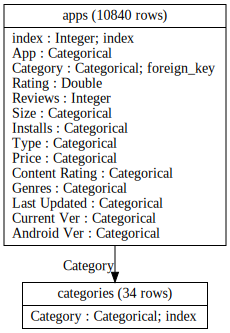

In [ ]:
es.plot()

5.	Realiza la síntesis profunda de características (DFS) con la entidad creada (`categories`) como objetivo. Observa el número de columnas de la matriz generada.

In [ ]:
feature_matrix, dfs_features = ft.dfs(entityset=es, target_dataframe_name='categories')
feature_matrix

,COUNT(apps),MAX(apps.Rating),MAX(apps.Reviews),MEAN(apps.Rating),MEAN(apps.Reviews),MIN(apps.Rating),MIN(apps.Reviews),MODE(apps.Android Ver),MODE(apps.App),MODE(apps.Content Rating),MODE(apps.Current Ver),MODE(apps.Genres),MODE(apps.Installs),MODE(apps.Last Updated),MODE(apps.Price),MODE(apps.Size),MODE(apps.Type),NUM_UNIQUE(apps.Android Ver),NUM_UNIQUE(apps.App),NUM_UNIQUE(apps.Content Rating),NUM_UNIQUE(apps.Current Ver),NUM_UNIQUE(apps.Genres),NUM_UNIQUE(apps.Installs),NUM_UNIQUE(apps.Last Updated),NUM_UNIQUE(apps.Price),NUM_UNIQUE(apps.Size),NUM_UNIQUE(apps.Type),SKEW(apps.Rating),SKEW(apps.Reviews),STD(apps.Rating),STD(apps.Reviews),SUM(apps.Rating),SUM(apps.Reviews)
Category,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ART_AND_DESIGN,65,5.0,295237.0,4.358065,2.637600e+04,3.2,0.0,4.1 and up,Textgram - write on photos,Everyone,1,Art & Design,"100,000+","July 30, 2018",0,11M,Free,10,64,3,40,4,12,52,2,48,2,-0.796318,2.940354,0.358297,6.932801e+04,270.2,1.714440e+06
AUTO_AND_VEHICLES,85,4.9,271920.0,4.190411,1.369019e+04,2.1,0.0,4.0 and up,AE Garage,Everyone,1,Auto & Vehicles,"100,000+","July 30, 2018",0,Varies with device,Free,14,85,3,63,1,15,55,4,57,2,-1.382970,4.436712,0.543692,4.340611e+04,305.9,1.163666e+06
BEAUTY,53,4.9,113715.0,4.278571,7.476226e+03,3.1,0.0,4.0.3 and up,AI Face Beauty Analysis - IntelliFace (Free),Everyone,1,Beauty,"10,000+","April 5, 2018",0,Varies with device,Free,11,53,4,36,1,12,48,1,37,1,-0.698343,3.965378,0.362603,1.909467e+04,179.7,3.962400e+05
BOOKS_AND_REFERENCE,231,5.0,2915189.0,4.346067,9.506090e+04,2.7,0.0,4.0 and up,Amazon Kindle,Everyone,Varies with device,Books & Reference,"1,000+","August 1, 2018",0,Varies with device,Free,18,222,4,111,1,17,180,14,105,2,-1.155845,6.208787,0.429046,3.532053e+05,773.6,2.195907e+07
BUSINESS,460,5.0,1279800.0,4.121452,3.033598e+04,1.0,0.0,4.1 and up,Box,Everyone,Varies with device,Business,100+,"August 2, 2018",0,Varies with device,Free,22,420,4,250,1,18,263,11,139,2,-1.446071,7.059731,0.624422,1.418051e+05,1248.8,1.395455e+07
COMICS,60,5.0,1013944.0,4.155172,5.638793e+04,2.8,1.0,4.0.3 and up,DC Comics,Everyone,Varies with device,Comics,"1,000,000+","July 31, 2018",0,Varies with device,Free,11,56,5,44,2,11,39,1,41,1,-0.757151,4.398250,0.537758,1.958715e+05,241.0,3.383276e+06
COMMUNICATION,387,5.0,69119316.0,4.158537,2.107138e+06,1.0,0.0,Varies with device,Viber Messenger,Everyone,Varies with device,Communication,"10,000,000+","August 3, 2018",0,Varies with device,Free,19,316,3,194,1,19,200,10,118,2,-2.497412,6.685781,0.426192,8.189705e+06,1364.0,8.154623e+08
DATING,234,5.0,516917.0,3.970769,3.115931e+04,1.0,0.0,4.0.3 and up,Adult Dirty Emojis,Mature 17+,1,Dating,"100,000+","July 24, 2018",0,Varies with device,Free,10,171,3,108,1,15,69,6,81,2,-1.376258,3.501138,0.630510,8.238692e+04,774.3,7.291278e+06
EDUCATION,156,4.9,6290507.0,4.389032,2.538191e+05,3.5,11.0,Varies with device,Duolingo: Learn Languages Free,Everyone,Varies with device,Education,"1,000,000+","August 1, 2018",0,Varies with device,Free,14,119,4,82,7,9,80,3,57,2,-0.521607,5.760850,0.251894,9.997874e+05,680.3,3.959579e+07


6.	Aplica las funciones definidas por FeatureTools para la selección de características:

```
*   selection.remove_highly_null_features()
*   selection.remove_single_value_features() 
*   selection.remove_highly_correlated_features()
```
Y con las dimensiones de la matriz resultante determina el número de características eliminadas.


In [ ]:
new_matrix, features = ft.selection.remove_highly_null_features(feature_matrix, features=dfs_features)
new_matrix, features = ft.selection.remove_single_value_features(new_matrix, features=features)
new_matrix, features = ft.selection.remove_highly_correlated_features(new_matrix, features=features)
feature_matrix.shape[1] - new_matrix.shape[1]

9